In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_deaths =  pd.read_csv("time_series_covid19_deaths_global.csv")
df_recovered =  pd.read_csv("time_series_covid19_recovered_global.csv")

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [4]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True) 
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [5]:
df_confirmed = df_confirmed.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Confirmed")
df_deaths = df_deaths.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Deaths")
df_recovered = df_recovered.melt(id_vars=["Province/State","Country","Lat","Long"],var_name = "Date",value_name="Recovered")

In [6]:
df_confirmed.head()

,Province/State,Country,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [7]:
df_confirmed["Deaths"] = df_deaths.Deaths
df_confirmed["Recovered"] = df_recovered.Recovered

In [8]:
df = df_confirmed

df.Date = pd.to_datetime(df.Date)

df.isna().sum()

Province/State    36260
Country               0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          2548
dtype: int64

In [9]:
confirmed = df.groupby('Date').sum()['Confirmed']
deaths = df.groupby('Date').sum()['Deaths']
recovered = df.groupby('Date').sum()['Recovered']

In [10]:
confirmed

Date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-31    17599905
2020-08-01    17850617
2020-08-02    18079723
2020-08-03    18282208
2020-08-04    18540119
Name: Confirmed, Length: 196, dtype: int64

In [13]:
recovered

Date
2020-01-22     28.0
2020-01-23     30.0
2020-01-24     36.0
2020-01-25     43.0
2020-01-26    102.0
              ...  
2020-07-31      0.0
2020-08-01      0.0
2020-08-02      0.0
2020-08-03      0.0
2020-08-04      0.0
Name: Recovered, Length: 196, dtype: float64

In [14]:
#NaN
recovered[recovered == 0.0]

Date
2020-07-27    0.0
2020-07-28    0.0
2020-07-29    0.0
2020-07-30    0.0
2020-07-31    0.0
2020-08-01    0.0
2020-08-02    0.0
2020-08-03    0.0
2020-08-04    0.0
Name: Recovered, dtype: float64

In [19]:
recovered = recovered[:-9]

recovered

Date
2020-01-22          28.0
2020-01-23          30.0
2020-01-24          36.0
2020-01-25          43.0
2020-01-26         102.0
                 ...    
2020-07-22    10528240.0
2020-07-23    10903964.0
2020-07-24    12405027.0
2020-07-25    11642826.0
2020-07-26     4879602.0
Name: Recovered, Length: 187, dtype: float64

In [15]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

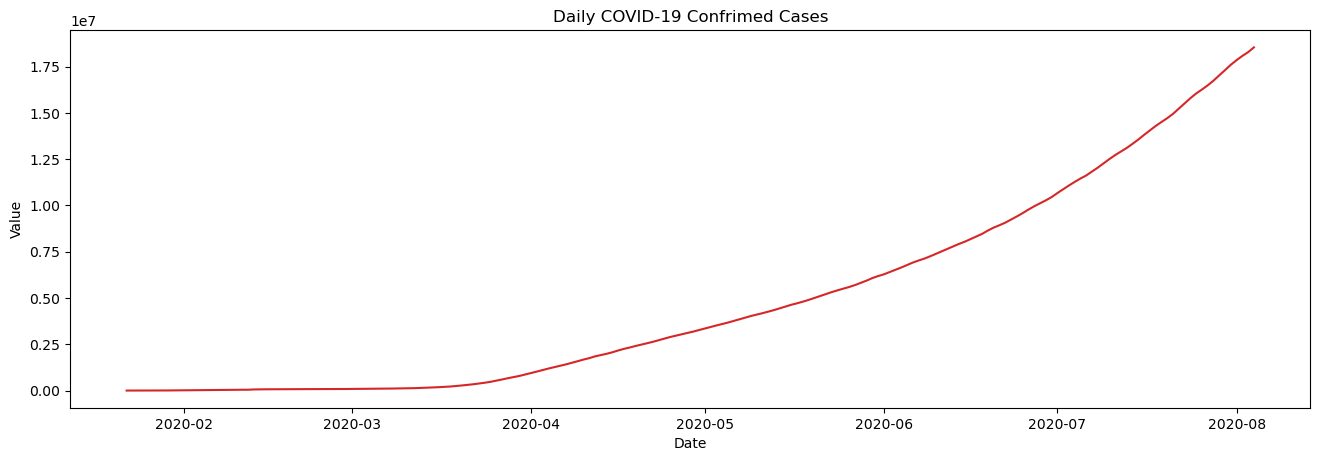

In [20]:
plot_df(x=confirmed.index,y=confirmed,title="Daily COVID-19 Confrimed Cases")

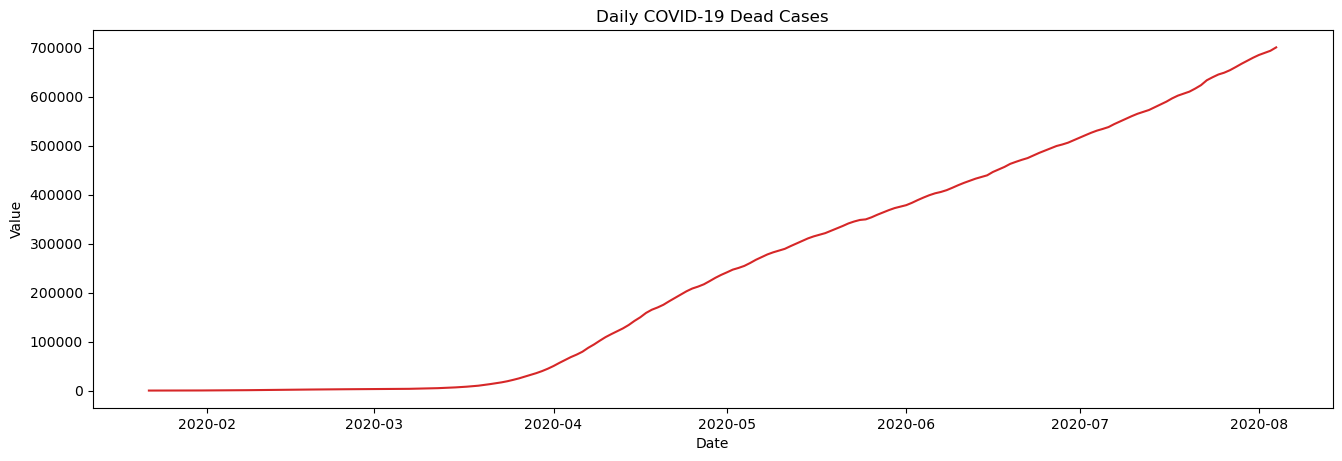

In [21]:
plot_df(x=deaths.index,y=deaths,title="Daily COVID-19 Dead Cases")

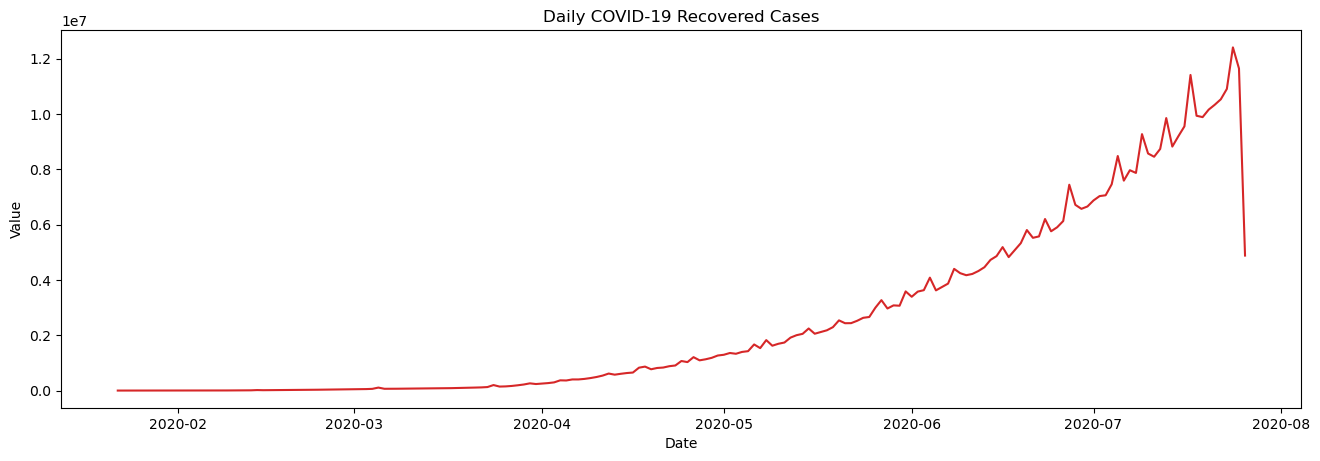

In [22]:
plot_df(x=recovered.index,y=recovered,title="Daily COVID-19 Recovered Cases")

In [51]:
model_con = ARIMA(confirmed, order=(1,1,2))
model_fit_con = model_con.fit(disp=0)
model_fit_con.summary()

C:\Users\20114\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\20114\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Confirmed   No. Observations:                  195
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2124.708
Method:                       css-mle   S.D. of innovations          12896.124
Date:                Wed, 05 Aug 2020   AIC                           4259.415
Time:                        18:56:08   BIC                           4275.780
Sample:                    01-23-2020   HQIC                          4266.041
                         - 08-04-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.507e+04    1.2e+05      0.793      0.428    -1.4e+05     3.3e+05
ar.L1.D.Confirmed     0.9987      0.002    513.691      0.000       0.995       1.002
ma.L1.D.Confirmed    -0.1716      0.062     -2.779      0.005      -0.293      -0.051
ma.L2.D.Confirmed    -0.3476      0.055     -6.364      0.000      -0.455      -0.241
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
MA.1            1.4671           +0.0000j            1.4671            0.0000
MA.2           -1.9609           +0.0000j            1.9609            0.5000
-----------------------------------------------------------------------------
"""

In [52]:
residuals = pd.DataFrame(model_fit_con.resid)

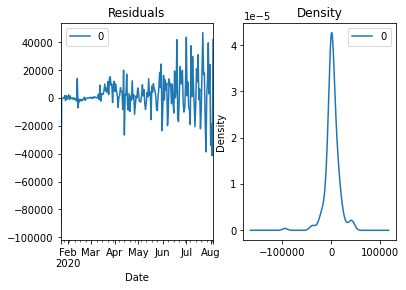

In [53]:
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

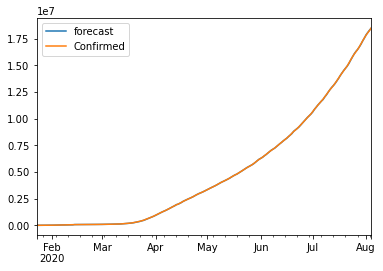

In [54]:
model_fit_con.plot_predict(dynamic=False)
plt.show()

In [55]:
start_index = '2020-08-04'
end_index = '2020-12-30'

predicted_con = model_fit_con.predict(start=start_index, end=end_index)

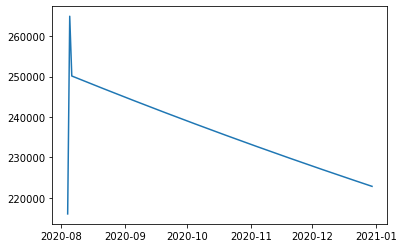

In [56]:
plt.plot(predicted_con)

In [58]:
model_de = ARIMA(deaths, order=(1,1,2))
model_fit_de = model_de.fit(disp=0)
model_fit_de.summary()

C:\Users\20114\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\20114\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Deaths   No. Observations:                  195
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1602.908
Method:                       css-mle   S.D. of innovations            892.764
Date:                Wed, 05 Aug 2020   AIC                           3215.817
Time:                        18:57:26   BIC                           3232.182
Sample:                    01-23-2020   HQIC                          3222.443
                         - 08-04-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3221.8325   1966.529      1.638      0.101    -632.494    7076.159
ar.L1.D.Deaths     0.9916      0.008    117.709      0.000       0.975       1.008
ma.L1.D.Deaths    -0.2733      0.062     -4.413      0.000      -0.395      -0.152
ma.L2.D.Deaths    -0.3460      0.054     -6.390      0.000      -0.452      -0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0085           +0.0000j            1.0085            0.0000
MA.1            1.3505           +0.0000j            1.3505            0.0000
MA.2           -2.1404           +0.0000j            2.1404            0.5000
-----------------------------------------------------------------------------
"""

In [59]:
residuals = pd.DataFrame(model_fit_de.resid)

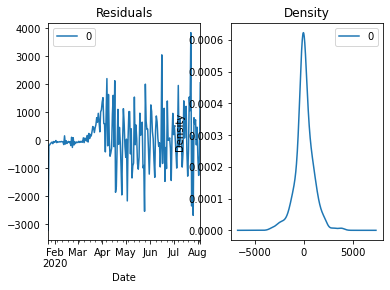

In [60]:
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [61]:
start_index = '2020-08-04'
end_index = '2020-12-30'

predicted_con = model_fit_con.predict(start=start_index, end=end_index)

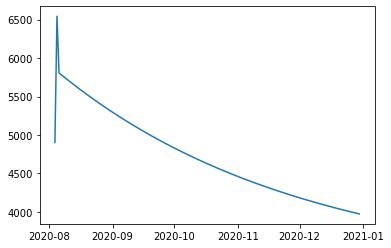

In [62]:
plt.plot(predicted_con)

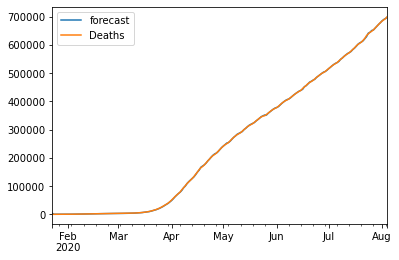

In [63]:
model_fit_con.plot_predict(dynamic=False)
plt.show()